# Property Price Prediction & Recommendation System

We will implement convolutional neural networks to predict property price according to the attributes, such as number of bedrooms, bathrooms, etc, and then we also implement a recommendation system to help users find the property they are looking for.


**We are importing Libraries which we will use in our project**

1. Numpy: Numerical computing library for efficient array operations and mathematical functions.
2. Pandas: Data manipulation and analysis library for structured data like tables and time series.
3. Seaborn: Statistical data visualization library built on top of Matplotlib for creating attractive plots.
4. Matplotlib: Widely-used data visualization library for creating static, animated, and interactive plots.
5. Keras: High-level deep learning library with a user-friendly API for building and training neural networks.
6. Scikit-Learn: Comprehensive machine learning library with various algorithms and tools for classification, regression, and clustering.
7. TensorFlow: Popular library for machine learning and numerical computation, often used for deep learning models.

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We are taking 2 datasets from kaggle links below:
1. https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah
2. https://www.kaggle.com/datasets/nafisbarizki/daftar-harga-rumah-jabodetabek

We have already cleaned and organized the data using Microsoft Excel from both datasets (remove irrelevant values, handle missing values, check duplicates, handle outliers, and check data types), so we obtained a total of 4500+ listings of properties data in the Jabodetabek area.

In [3]:
import pandas as pd
df1 = pd.read_excel('sample_data/data_rumah_dijual.xlsx', sheet_name='data_rumah_dijual')
df1.head(5)

,NAMA RUMAH,KOTA,LATITUDE,LONGITUDE,HARGA (Rp),LUAS BANGUNAN (m2),LUAS TANAH (m2),KAMAR TIDUR,KAMAR MANDI,GARASI,SERTIFIKAT,NOMOR TELEPON
0,Rumah Murah Bekasi,Bekasi,-6223945.0,1.069863e+09,3800000000,220,220,3,3,tidak ada,shm - sertifikat hak milik,6285411637446
1,Minimalis Baru Jalan 2 Mobil,Bekasi,-6223945.0,1.069863e+09,4500000000,250,96,5,4,ada,"lainnya (ppjb,girik,adat,dll)",6284785709476
2,Rumah standard hitung tanah dalam,Bekasi,-6223945.0,1.069863e+09,7500000000,150,253,5,2,ada,shm - sertifikat hak milik,6286069394345
3,Rumah Mewah Bekasi,Bekasi,-6223945.0,1.069863e+09,6000000000,450,240,9,9,tidak ada,shm - sertifikat hak milik,6289043362090
4,RUMAH MURAH BEKASI,Bekasi,-6223945.0,1.069863e+09,8000000000,300,232,6,5,tidak ada,"lainnya (ppjb,girik,adat,dll)",6289655065930


In [4]:
df2 = pd.read_excel('sample_data/daftar_rumah_jabodetabek.xlsx', sheet_name='daftar_rumah_jabodetabek')
df2.head (5)

,NAMA RUMAH,KOTA,LATITUDE,LONGITUDE,HARGA (Rp),LUAS BANGUNAN (m2),LUAS TANAH (m2),KAMAR TIDUR,KAMAR MANDI,GARASI,SERTIFIKAT,NOMOR TELEPON
0,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,Bekasi,-6223945,1069862751,2990000000,272,239,4,4,tidak ada,shm - sertifikat hak milik,6286442500425
1,"Rumah Kekinian, Magenta Summarecon Bekasi",Bekasi,-6223945,1069862751,1270000000,69,55,3,2,tidak ada,hgb - hak guna bangunan,6288430579106
2,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,Bekasi,-6223945,1069862751,1950000000,131,119,3,3,ada,hgb - hak guna bangunan,6281883237579
3,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,Bekasi,-6223945,1069862751,3300000000,174,180,3,3,ada,shm - sertifikat hak milik,6283678520501
4,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...",Bekasi,-6223945,1069862751,4500000000,196,328,4,3,ada,shm - sertifikat hak milik,6284011961342


We are contatenating datasets which are present in both datasets

In [5]:
# Combine the datasets by concatenating the rows
combined_df = pd.concat([df1, df2])

# Print the combined dataframe
combined_df.head()

,NAMA RUMAH,KOTA,LATITUDE,LONGITUDE,HARGA (Rp),LUAS BANGUNAN (m2),LUAS TANAH (m2),KAMAR TIDUR,KAMAR MANDI,GARASI,SERTIFIKAT,NOMOR TELEPON
0,Rumah Murah Bekasi,Bekasi,-6223945.0,1.069863e+09,3800000000,220,220,3,3,tidak ada,shm - sertifikat hak milik,6285411637446
1,Minimalis Baru Jalan 2 Mobil,Bekasi,-6223945.0,1.069863e+09,4500000000,250,96,5,4,ada,"lainnya (ppjb,girik,adat,dll)",6284785709476
2,Rumah standard hitung tanah dalam,Bekasi,-6223945.0,1.069863e+09,7500000000,150,253,5,2,ada,shm - sertifikat hak milik,6286069394345
3,Rumah Mewah Bekasi,Bekasi,-6223945.0,1.069863e+09,6000000000,450,240,9,9,tidak ada,shm - sertifikat hak milik,6289043362090
4,RUMAH MURAH BEKASI,Bekasi,-6223945.0,1.069863e+09,8000000000,300,232,6,5,tidak ada,"lainnya (ppjb,girik,adat,dll)",6289655065930


Checking shape of dataset

In [6]:
print("Shape of Dataset ",combined_df.shape)

Shape of Dataset  (4527, 12)


Checking first 5 rows of dataset

In [7]:
combined_df.head(5)

,NAMA RUMAH,KOTA,LATITUDE,LONGITUDE,HARGA (Rp),LUAS BANGUNAN (m2),LUAS TANAH (m2),KAMAR TIDUR,KAMAR MANDI,GARASI,SERTIFIKAT,NOMOR TELEPON
0,Rumah Murah Bekasi,Bekasi,-6223945.0,1.069863e+09,3800000000,220,220,3,3,tidak ada,shm - sertifikat hak milik,6285411637446
1,Minimalis Baru Jalan 2 Mobil,Bekasi,-6223945.0,1.069863e+09,4500000000,250,96,5,4,ada,"lainnya (ppjb,girik,adat,dll)",6284785709476
2,Rumah standard hitung tanah dalam,Bekasi,-6223945.0,1.069863e+09,7500000000,150,253,5,2,ada,shm - sertifikat hak milik,6286069394345
3,Rumah Mewah Bekasi,Bekasi,-6223945.0,1.069863e+09,6000000000,450,240,9,9,tidak ada,shm - sertifikat hak milik,6289043362090
4,RUMAH MURAH BEKASI,Bekasi,-6223945.0,1.069863e+09,8000000000,300,232,6,5,tidak ada,"lainnya (ppjb,girik,adat,dll)",6289655065930


In [8]:
combined_df.tail(2)

,NAMA RUMAH,KOTA,LATITUDE,LONGITUDE,HARGA (Rp),LUAS BANGUNAN (m2),LUAS TANAH (m2),KAMAR TIDUR,KAMAR MANDI,GARASI,SERTIFIKAT,NOMOR TELEPON
3515,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,Tangerang,-62882374.0,1.066659e+09,800000000,65,60,3,2,tidak ada,shm - sertifikat hak milik,6283004169775
3516,"Rumah 2 Lantai Harga 1 Lantai Di Pamulang, Fre...",Tangerang,-62969629.0,1.067106e+08,655000000,60,64,3,2,ada,shm - sertifikat hak milik,6283416672839


In [9]:
combined_df.dtypes

NAMA RUMAH             object
KOTA                   object
LATITUDE              float64
LONGITUDE             float64
HARGA (Rp)              int64
LUAS BANGUNAN (m2)      int64
LUAS TANAH (m2)         int64
KAMAR TIDUR             int64
KAMAR MANDI             int64
GARASI                 object
SERTIFIKAT             object
NOMOR TELEPON           int64
dtype: object

Taking a information about dataset

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4527 entries, 0 to 3516
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NAMA RUMAH          4527 non-null   object 
 1   KOTA                4527 non-null   object 
 2   LATITUDE            4423 non-null   float64
 3   LONGITUDE           4423 non-null   float64
 4   HARGA (Rp)          4527 non-null   int64  
 5   LUAS BANGUNAN (m2)  4527 non-null   int64  
 6   LUAS TANAH (m2)     4527 non-null   int64  
 7   KAMAR TIDUR         4527 non-null   int64  
 8   KAMAR MANDI         4527 non-null   int64  
 9   GARASI              4527 non-null   object 
 10  SERTIFIKAT          4527 non-null   object 
 11  NOMOR TELEPON       4527 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 459.8+ KB


**Data Visualization**

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
df = combined_df.copy()

In [34]:
df=df.select_dtypes(exclude="O")

In [35]:
df.dropna(axis=1,inplace=True)

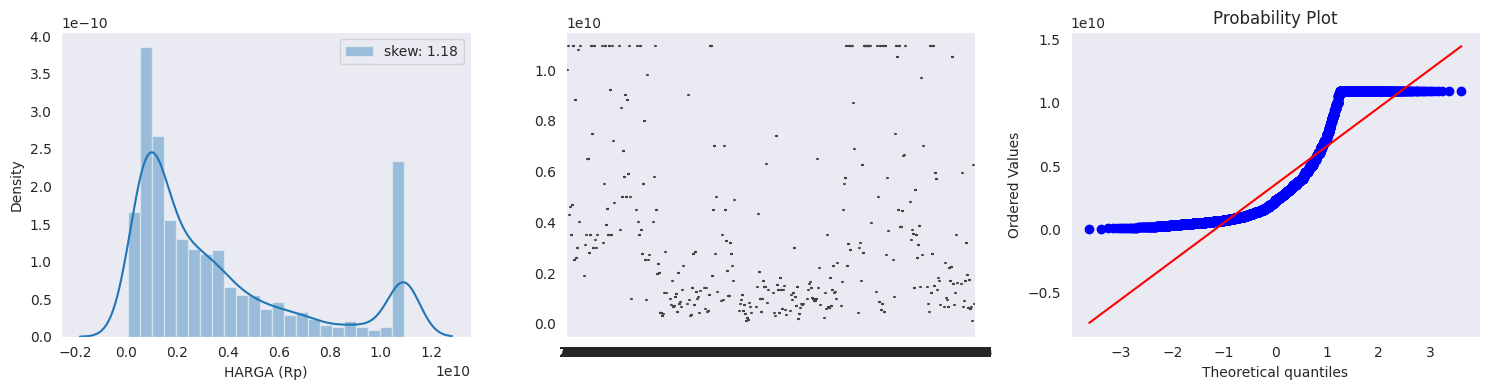

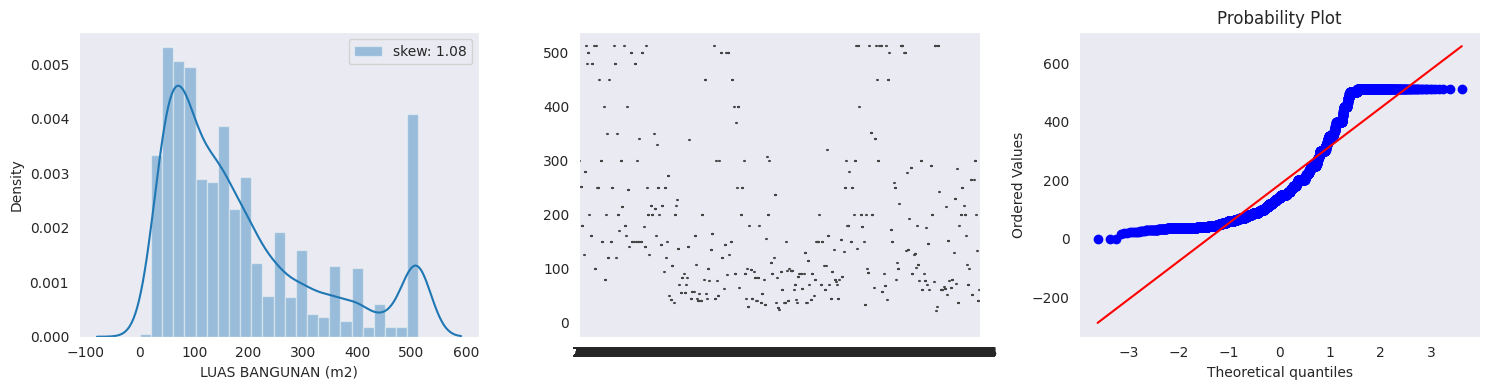

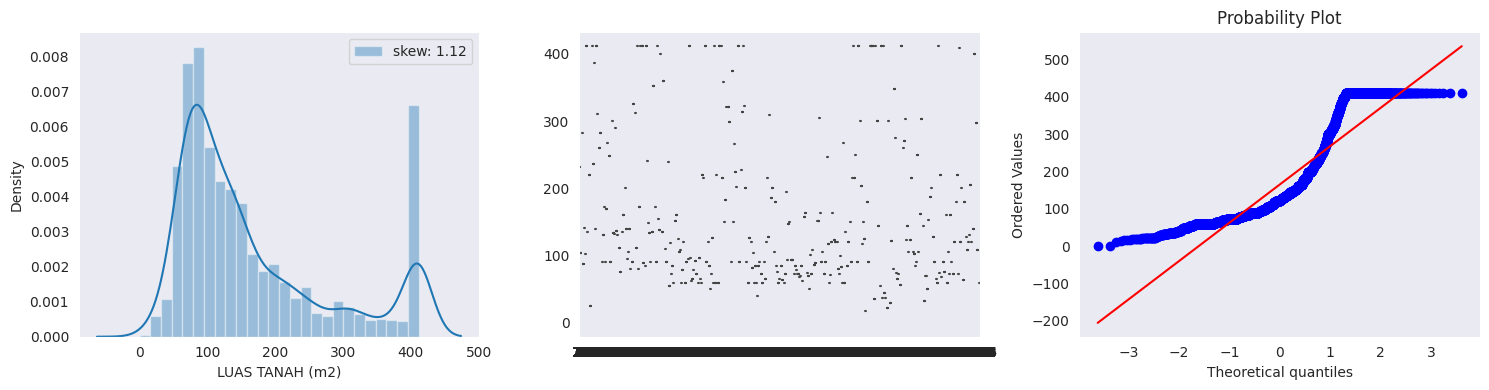

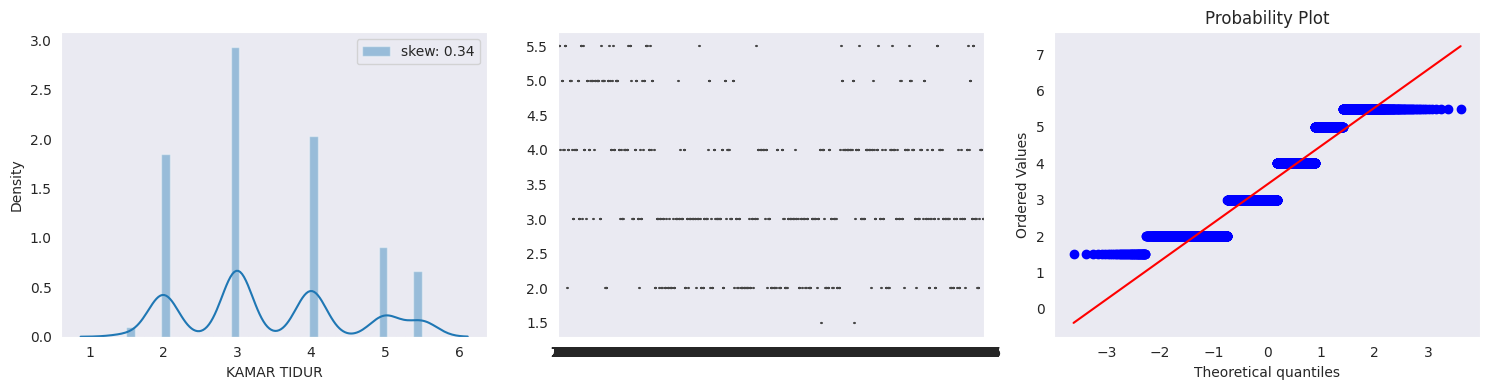

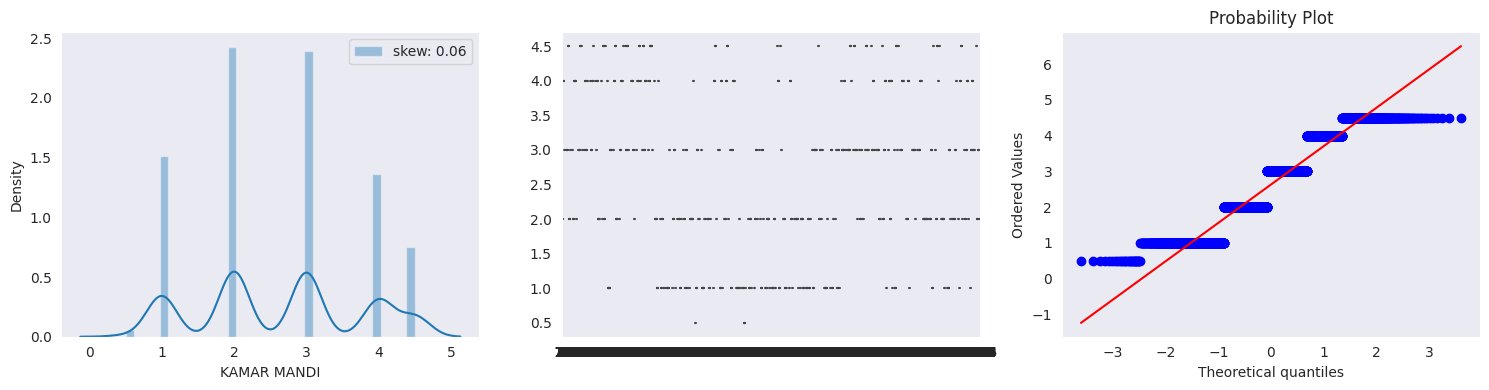

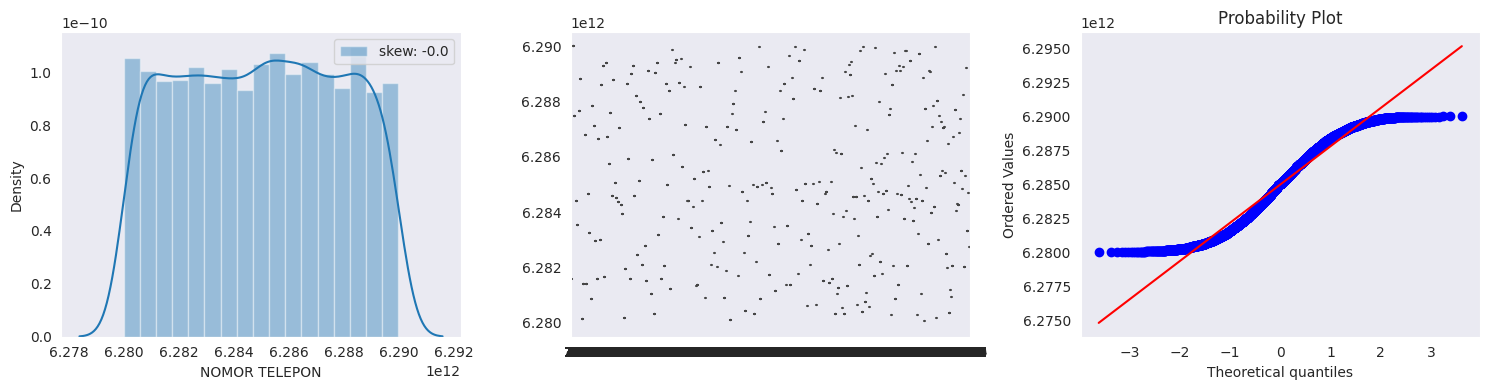

In [36]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter("ignore")
features = df.columns
import seaborn as sns
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col],dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()

Removing outliers by the help of IQR method

In [14]:
def iqr_capping(df, cols, factor):

    for col in cols:
      try:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(
            df[col] > upper_whisker,
            upper_whisker,
            np.where(
        df[col] < lower_whisker,
        lower_whisker,
        df[col]))
      except:
        pass
    return df

df = iqr_capping(df, df.columns[:], 1.5)

Splitting into input and output


In [15]:
df = df.select_dtypes(exclude="O")
df.dropna(axis=1,inplace=True)

In [16]:
X= df.drop('HARGA (Rp)',axis=1)
y=np.log(df['HARGA (Rp)']+1)
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_validation, y_train, y__validation = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [17]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

import numpy as np
from sklearn.feature_selection import SelectKBest,chi2


pt = PowerTransformer()
scaler = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,5))
])

In [18]:
pipe = Pipeline([

     ("pt",pt),

    ('scaler',scaler),

])

**Code for evaluation Metrics**

In [19]:
from sklearn import metrics
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('R2 Score', round(r2_square,2))

    print('__________________________________')


**We are trying to implement 3 models**

1.RandomForestRegressor

2.AdaBoostRegressor

3.LinearRegression

In [21]:
from sklearn.linear_model import LogisticRegression


model_rf = RandomForestRegressor()
model_adaboost = AdaBoostRegressor()
model_lr = LinearRegression()
l = []
models = [("AdaBoostRegressor",model_adaboost),
          ("LinearRegression",model_lr),("RandomForestRegressor",model_rf)
          ]

for name,model in models:
  pipe_f = Pipeline([
      ('trf1',pipe),
      ('model',model),

  ])


  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)
  pipe_f.fit(x_train,y_train)
  y_pred = pipe_f.predict(x_test)
  print("*"*10,name,"*"*10)
  print_evaluate(y_test,y_pred)

********** AdaBoostRegressor **********
R2 Score 0.79
__________________________________
********** LinearRegression **********
R2 Score 0.82
__________________________________
********** RandomForestRegressor **********
R2 Score 0.87
__________________________________


In [22]:
import pickle as pkl
with open('model.pkl', 'wb') as f:
    pkl.dump(pipe_f, f)

In [23]:
np.exp(pipe_f.predict([df.head(1).values[0][1:]]))[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


3897930682.9742994

## Implementing CNN


The code splits the data into training and testing sets, reshapes the input data if needed, normalizes the input data, defines a CNN architecture with convolutional and dense layers, compiles the model with an optimizer and loss function, and trains the model on the training data for a specified number of epochs using a batch size.

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, np.log(y), test_size=0.2, random_state=42)
num_features =X.shape[1]

# Reshape the input data if necessary
X_train = X_train.reshape(-1, num_features, 1)
X_test = X_test.reshape(-1, num_features, 1)

# Normalize input data if needed
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')  # Assuming regression problem
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Make predictions
predictions = model.predict(X_test)


Epoch 1/10
114/114 [==============================] - 10s 8ms/step - loss: 2.6052 - mae: 1.3298 - val_loss: 30345.8594 - val_mae: 144.6211
Epoch 2/10
114/114 [==============================] - 1s 5ms/step - loss: 0.2545 - mae: 0.4174 - val_loss: 22543.6816 - val_mae: 124.3970
Epoch 3/10
114/114 [==============================] - 1s 5ms/step - loss: 0.1252 - mae: 0.2756 - val_loss: 18765.0957 - val_mae: 113.2382
Epoch 4/10
114/114 [==============================] - 1s 5ms/step - loss: 0.0634 - mae: 0.1879 - val_loss: 15130.5205 - val_mae: 101.5123
Epoch 5/10
114/114 [==============================] - 1s 6ms/step - loss: 0.0318 - mae: 0.1301 - val_loss: 12143.8623 - val_mae: 90.9088
Epoch 6/10
114/114 [==============================] - 0s 4ms/step - loss: 0.0158 - mae: 0.0916 - val_loss: 10149.0684 - val_mae: 83.0672
Epoch 7/10
114/114 [==============================] - 0s 4ms/step - loss: 0.0083 - mae: 0.0669 - val_loss: 8787.3584 - val_mae: 77.2513
Epoch 8/10
114/114 [=================

## Using Cosine Similarity

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(X, X.head(1).values)

# Get the indices of the most similar instances
similar_indices = similarity_matrix.argsort(axis=0)[-10:-5].flatten()
# Retrieve the similar instances from the original DataFrame
similar_instances = df.iloc[similar_indices]

similar_instances

,HARGA (Rp),LUAS BANGUNAN (m2),LUAS TANAH (m2),KAMAR TIDUR,KAMAR MANDI,NOMOR TELEPON
493,3.100000e+09,250.0,179.0,5.0,3.0,6.284689e+12
502,2.000000e+09,110.0,105.0,2.0,2.0,6.286836e+12
500,2.300000e+09,143.0,200.0,3.0,2.0,6.283625e+12
499,1.200000e+09,90.0,107.0,3.0,1.0,6.283975e+12
498,4.200000e+08,36.0,60.0,2.0,1.0,6.284832e+12


## Using KNN

In [30]:
from sklearn.neighbors import NearestNeighbors
k = 5  # Number of nearest neighbors to consider
knn = NearestNeighbors(n_neighbors=k)
new_instance = X.head(1).values
knn.fit(X.values)

# Find the indices of the most similar instances
distances, indices = knn.kneighbors(new_instance)

# Retrieve the similar instances from the original DataFrame
similar_instances = df.iloc[indices[0]]

similar_instances

,HARGA (Rp),LUAS BANGUNAN (m2),LUAS TANAH (m2),KAMAR TIDUR,KAMAR MANDI,NOMOR TELEPON
0,3.800000e+09,220.0,220.0,3.0,3.0,6.285412e+12
656,6.500000e+09,360.0,313.0,4.0,4.5,6.285412e+12
469,1.093950e+10,512.5,411.5,5.5,4.5,6.285411e+12
2432,4.400000e+08,42.0,21.0,2.0,2.0,6.285411e+12
450,6.500000e+09,300.0,200.0,5.0,4.5,6.285410e+12
